Machine Learning Midterm: The acquisition of data, cleanse and managing the data, then reporting on the data used. This data also includes a use of AI to determine sentiment of movies in 2015.

In [1]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 2.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 4.2 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.9/187.9 kB 4.7 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.4/296.4 kB 5.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 1.3 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 5.6 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 2.1 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.4/166.4 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 6.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.4/121.4 kB 1.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61

In [14]:
import pymongo 
import certifi
import re

In [15]:
import json

with open ('/Users/helenavnss/Desktop/DA310/Secrets.json') as f:
    data = json.load(f)

secret_key = data['mongodb']

print(f"My secret key is {len(secret_key)} characters in length.")

My secret key is 66 characters in length.


In [17]:
# Once you have retrieved your connection string from a secrets file, use it here
mongo_connection_string = data ['mongodb']

# Connect to the database using known good certificates
client = pymongo.MongoClient(mongo_connection_string, tlsCAFile=certifi.where())

# Fetch the database named "DA320"
da320_database = client['DA320']

# Within the database we have "collections". Think of them as tables in SQL.
allCollections = da320_database.list_collection_names()

# Here is the list of collections within my database
print(f"Using MongoDB version {client.server_info()['version']}.")
print(f"This database has the collections {allCollections}")

Using MongoDB version 6.0.11.
This database has the collections ['metacritic_movies', 'imdb_superhero_2', 'IMDB_Pipeline_View']


In [18]:
import pandas 

# Retrieve all records from a collection 
cursor = da320_database["IMDB_Pipeline_View"].find()

In [19]:
# Convert this information into a Pandas dataframe
IMDB_Pipeline_View = pandas.DataFrame(cursor)

# Make sure we've read the information correctly
IMDB_Pipeline_View.head()

,_id,id,title,opening_weekend,runtime,user_rating,votes,budget,gross_sales,release_date,genres,cast,director,producer,companies,ratings_array,slimmed_rating,release_year,release_month,release_day
0,652b456de29964c129735c96,77631,Grease,60759.0,110.0,7.2,265183,6000000.0,394955690.0,1978-06-13,"[Comedy, Musical, Romance]","[John Travolta, Olivia Newton-John, Stockard C...",[Randal Kleiser],"[Allan Carr, Neil A. Machlis, Robert Stigwood]","[Paramount Pictures, Robert Stigwood Organizat...","[TV-14, (D)]",TV-14,1978,6,13
1,652b456de29964c129735c97,78346,Superman,7465343.0,143.0,7.4,172769,55000000.0,166200000.0,1978-12-10,"[Action, Adventure, Sci-Fi]","[Marlon Brando, Gene Hackman, Christopher Reev...",[Richard Donner],"[Charles Greenlaw, Richard Lester, Alexander S...","[Dovemead Films, Film Export A.G., Internation...","[TV-PG, (LV)]",TV-PG,1978,12,10
2,652b456de29964c129735c98,77416,The Deer Hunter,NaN,183.0,8.1,334827,15000000.0,NaN,1978-12-08,"[Drama, War]","[Robert De Niro, John Cazale, John Savage, Chr...",[Michael Cimino],"[Joann Carelli, Michael Cimino, Michael Deeley...","[EMI Films, Universal Pictures]",[R],R,1978,12,8
3,652b456de29964c129735c99,77651,Halloween,NaN,91.0,7.7,267109,300000.0,70000000.0,1978-10-25,"[Horror, Thriller]","[Donald Pleasence, Jamie Lee Curtis, Nancy Kye...",[John Carpenter],"[Moustapha Akkad, John Carpenter, Debra Hill, ...","[Compass International Pictures, Falcon Intern...",[TV-14],TV-14,1978,10,25
4,652b456de29964c129735c9a,77975,National Lampoon's Animal House,201747.0,109.0,7.4,119917,3000000.0,3371006.0,1978-07-27,[Comedy],"[Tom Hulce, Stephen Furst, Mark Metcalf, Mary ...",[John Landis],"[Ivan Reitman, Matty Simmons]","[Universal Pictures, Oregon Film Factory, Stag...","[TV-14, (DLSV, TV Rating.)]",TV-14,1978,7,27


In [20]:
#Data from IMDB for one year
imdb_view = pandas.DataFrame(da320_database.IMDB_Pipeline_View.find({"release_year": 2015}))
imdb_view.head()


,_id,id,title,opening_weekend,runtime,user_rating,votes,budget,gross_sales,release_date,genres,cast,director,producer,companies,ratings_array,slimmed_rating,release_year,release_month,release_day
0,652b45b7e29964c12973af28,369610,Jurassic World,208806270.0,124,6.9,628966,150000000.0,1.648855e+09,2015-05-29,"[Action, Adventure, Sci-Fi]","[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",[Colin Trevorrow],"[Patrick Crowley, Frank Marshall, Christopher ...","[Universal Pictures, Amblin Entertainment, Leg...","[TV-14, (LV)]",TV-14,2015,5,29
1,652b45b7e29964c12973af29,2322441,Fifty Shades of Grey,94395000.0,125,4.1,316433,40000000.0,5.710061e+08,2015-02-09,"[Drama, Romance, Thriller]","[Dakota Johnson, Jamie Dornan, Jennifer Ehle, ...",[Sam Taylor-Johnson],"[Jeb Brody, Dana Brunetti, Michael De Luca, E....","[Focus Features, Michael De Luca Productions, ...","[TV-14, (DLS)]",TV-14,2015,2,9
2,652b45b7e29964c12973af2a,2379713,Spectre,NaN,148,6.8,433880,245000000.0,8.806742e+08,2015-10-26,"[Action, Adventure, Thriller]","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes],"[Zakaria Alaoui, Barbara Broccoli, Daniel Crai...","[B24, Columbia Pictures, Danjaq, Eon Productio...",[PG-13],PG-13,2015,10,26
3,652b45b7e29964c12973af2b,3569230,Legend,NaN,132,6.9,177006,30000000.0,4.297299e+07,2015-09-03,"[Biography, Crime, Drama, Thriller]","[Paul Anderson, Tom Hardy, Christopher Ecclest...",[Brian Helgeland],"[Michael Bassick, Tim Bevan, Liza Chasin, Chri...","[Cross Creek Pictures, Working Title Films, An...","[TV-14, (DLSV, TV Rating.)]",TV-14,2015,9,3
4,652b45b7e29964c12973af2d,2381249,Mission: Impossible - Rogue Nation,55520089.0,131,7.4,366873,150000000.0,7.008684e+08,2015-07-23,"[Action, Adventure, Thriller]","[Tom Cruise, Jeremy Renner, Simon Pegg, Rebecc...",[Christopher McQuarrie],"[J.J. Abrams, Zakaria Alaoui, Bryan Burk, Tom ...","[Paramount Pictures, Skydance Media, Bad Robot...",[PG-13],PG-13,2015,7,23


In [21]:
# Retrieve all records from a collection 
cursor = da320_database["metacritic_movies"].find()

In [22]:
# Convert this information into a Pandas dataframe
metacritic_movies = pandas.DataFrame(cursor)

# Make sure we've read the information correctly
metacritic_movies.head()

,_id,movie_id,title,release_date,description,score,thumbnail
0,652b45f0e29964c12973cfa0,11234,"Crouching Tiger, Hidden Dragon","December 8, 2000","In 19th century China, a magical sword given b...",94,https://static.metacritic.com/images/products/...
1,652b45f0e29964c12973cfa1,11235,Yi Yi,"October 6, 2000",This film portrays life through portraits of t...,93,https://static.metacritic.com/images/products/...
2,652b45f0e29964c12973cfa2,11236,Beau Travail,"March 31, 2000",The soldiers of a small French Foreign Legion ...,91,https://static.metacritic.com/images/products/...
3,652b45f0e29964c12973cfa3,11237,Almost Famous,"September 13, 2000","In the 1970's, a high school boy (Fugit) is gi...",90,https://static.metacritic.com/images/products/...
4,652b45f0e29964c12973cfa4,11238,Chicken Run,"June 21, 2000",A claymation spoof of classic prison-camp flic...,88,https://static.metacritic.com/images/products/...


In [28]:
#Data from metacritic for one year
metacritic_view = pandas.DataFrame(da320_database.metacritic_movies.find({"release_date": re.compile("2015")}))

#Ensure results
metacritic_view.head()

,_id,movie_id,title,release_date,description,score,thumbnail
0,652b460de29964c12973ebe9,18475,Carol,"November 20, 2015","Set in 1950s New York, two women from very dif...",94,https://static.metacritic.com/images/products/...
1,652b460de29964c12973ebea,18476,45 Years,"December 23, 2015",There is just one week until Kate Mercer's (Ch...,94,https://static.metacritic.com/images/products/...
2,652b460de29964c12973ebeb,18477,Inside Out,"June 19, 2015","Growing up can be a bumpy road, and it’s no ex...",94,https://static.metacritic.com/images/products/...
3,652b460de29964c12973ebec,18478,Sherpa,"October 2, 2015",A fight on Everest? It seemed incredible. But ...,93,https://static.metacritic.com/images/products/...
4,652b460de29964c12973ebed,18479,Spotlight,"November 6, 2015",Spotlight tells the riveting true story of the...,93,https://static.metacritic.com/images/products/...


In [29]:
#convert values to numbers 
metacritic_view.score = pandas.to_numeric(metacritic_view.score, errors='coerce')
metacritic_view.release_date = pandas.to_datetime(metacritic_view.release_date, errors='coerce')


In [30]:
#Merge the two datasets together using an inner join 
unified_view = pandas.merge(imdb_view, metacritic_view, how="inner", on="title")
unified_view.head()

,_id_x,id,title,opening_weekend,runtime,user_rating,votes,budget,gross_sales,release_date_x,...,slimmed_rating,release_year,release_month,release_day,_id_y,movie_id,release_date_y,description,score,thumbnail
0,652b45b7e29964c12973af28,369610,Jurassic World,208806270.0,124,6.9,628966,150000000.0,1.648855e+09,2015-05-29,...,TV-14,2015,5,29,652b460de29964c12973ed44,18822,2015-06-12,Twenty-two years after the events of Jurassic ...,59,https://static.metacritic.com/images/products/...
1,652b45b7e29964c12973af29,2322441,Fifty Shades of Grey,94395000.0,125,4.1,316433,40000000.0,5.710061e+08,2015-02-09,...,TV-14,2015,2,9,652b460de29964c12973edcb,18957,2015-02-13,Recent college graduate Anastasia Steele begin...,46,https://static.metacritic.com/images/products/...
2,652b45b7e29964c12973af2b,3569230,Legend,NaN,132,6.9,177006,30000000.0,4.297299e+07,2015-09-03,...,TV-14,2015,9,3,652b460de29964c12973ed6e,18864,2015-11-20,Identical twin gangsters Ronald and Reginald K...,55,https://static.metacritic.com/images/products/...
3,652b45b7e29964c12973af2d,2381249,Mission: Impossible - Rogue Nation,55520089.0,131,7.4,366873,150000000.0,7.008684e+08,2015-07-23,...,PG-13,2015,7,23,652b460de29964c12973ec71,18611,2015-07-31,"With the IMF disbanded, and Ethan (Tom Cruise)...",75,https://static.metacritic.com/images/products/...
4,652b45b7e29964c12973af2e,3397884,Sicario,12148041.0,121,7.6,419398,30000000.0,8.487244e+07,2015-05-19,...,R,2015,5,19,652b460de29964c12973ec18,18522,2015-09-18,"In Mexico, Sicario means hitman. In the lawles...",82,https://static.metacritic.com/images/products/...


In [43]:
pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 207.1 kB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.2/37.2 MB 215.6 kB/s eta 0:00:0000:0100:05
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 330.1 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [26]:
import statsmodels.formula.api

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [48]:
#Plot a linear relationship using all the numeric values we have at the same time 
ols_model = statsmodels.formula.api.ols(
    formula="gross_sales ~ user_rating + budget + opening_weekend + votes + + sentiment + runtime",
    data=unified_view).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:            gross_sales   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     179.6
Date:                Sat, 11 Nov 2023   Prob (F-statistic):           3.04e-37
Time:                        21:35:30   Log-Likelihood:                -1364.4
No. Observations:                  69   AIC:                             2743.
Df Residuals:                      62   BIC:                             2758.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        9.855e+06   1.24e+08     

In [48]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.7/229.7 MB 165.4 kB/s eta 0:00:0000:0100:30
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 330.4 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 353.3 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 293.0 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 287.1 kB/s eta 0:00:0000:0100:03
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 246.6 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 303.6 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.9/393.9 kB 244.5 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 243.6 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 325.5 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 316.7 kB/s eta 0:00:0000:0100:01
     ━━

In [54]:
pip install sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 309.3 kB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [32]:
from transformers import pipeline
import tensorflow
import transformers

In [33]:
import sentencepiece

In [34]:
#Uses classification library pubished on http://huggingface.co/distillbert-base-unicased
classifier = pipeline("fill-mask", model="distilbert-base-uncased")
classifier("I am really interested to learn about [MASK].")

All PyTorch model weights were used when initializing TFDistilBertForMaskedLM.

All the weights of TFDistilBertForMaskedLM were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForMaskedLM for predictions without further training.


[{'score': 0.01434160303324461,
  'token': 2009,
  'token_str': 'it',
  'sequence': 'i am really interested to learn about it.'},
 {'score': 0.01293104887008667,
  'token': 7366,
  'token_str': 'biology',
  'sequence': 'i am really interested to learn about biology.'},
 {'score': 0.012373986653983593,
  'token': 5855,
  'token_str': 'photography',
  'sequence': 'i am really interested to learn about photography.'},
 {'score': 0.011521736159920692,
  'token': 2870,
  'token_str': 'myself',
  'sequence': 'i am really interested to learn about myself.'},
 {'score': 0.010789849795401096,
  'token': 12799,
  'token_str': 'astronomy',
  'sequence': 'i am really interested to learn about astronomy.'}]

In [35]:
MODEL = "cardiffnlp/twitter-xlm-roberta-base-sentiment"

In [8]:

sentiment_task = transformers.pipeline("sentiment-analysis", model = MODEL,
                                       tokenizer=transformers.AutoTokenizer.from_pretrained(MODEL))

All model checkpoint layers were used when initializing TFXLMRobertaForSequenceClassification.

All the layers of TFXLMRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-xlm-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLMRobertaForSequenceClassification for predictions without further training.


In [36]:
#when I first executed this, it gave a negative score 
print(sentiment_task("Covid cases are increasingly fast!"))

#This task gave a positive score of 
print(sentiment_task("I really love ice crease on a warm day!"))

#My attempt at something neutral
print(sentiment_task("The book Moby Dick was written by Herman Melville"))

[{'label': 'neutral', 'score': 0.4455960690975189}]
[{'label': 'positive', 'score': 0.8447833061218262}]
[{'label': 'neutral', 'score': 0.7707720398902893}]


In [41]:
#Create a function to turn the sentiment analysis object into a single layer 
def calculate_sentiment(text):
    if text is None: 
        return 0 
    sentiment = sentiment_task(text)
    if sentiment [0]['label'] == 'negative':
        return 0 - sentiment[0]['score'] - 0.5
    elif sentiment[0]['label'] == 'neutral':
        return sentiment[0]['score'] - 0.5
    elif sentiment[0]['label'] == 'positive':
        return 1 + sentiment[0]['score'] - 0.5 
    
#Test the function 
print(calculate_sentiment("I came down with the flu and I'm feeling really sick."))



-1.393040657043457


In [42]:
#First we apply a lambda to calculate sentiment for the movies in the dataset 
# We ise "row.get('description')" instead of "row['description']" because it returns None if there is no description 

sentiment_column = unified_view.apply(lambda row : calculate_sentiment(row.get('description')), axis =1)

#add this column back into the unified view
#assign it via an array indexer allows us to re-run this code block multiple times and replace the sentiment column 
#so we can tinker with it and update the calculations 
unified_view["sentiment"] = sentiment_column

#debugging - ensure we have results 
unified_view.head()

,_id_x,id,title,opening_weekend,runtime,user_rating,votes,budget,gross_sales,release_date_x,...,release_year,release_month,release_day,_id_y,movie_id,release_date_y,description,score,thumbnail,sentiment
0,652b45b7e29964c12973af28,369610,Jurassic World,208806270.0,124,6.9,628966,150000000.0,1.648855e+09,2015-05-29,...,2015,5,29,652b460de29964c12973ed44,18822,2015-06-12,Twenty-two years after the events of Jurassic ...,59,https://static.metacritic.com/images/products/...,-0.082567
1,652b45b7e29964c12973af29,2322441,Fifty Shades of Grey,94395000.0,125,4.1,316433,40000000.0,5.710061e+08,2015-02-09,...,2015,2,9,652b460de29964c12973edcb,18957,2015-02-13,Recent college graduate Anastasia Steele begin...,46,https://static.metacritic.com/images/products/...,0.065443
2,652b45b7e29964c12973af2b,3569230,Legend,NaN,132,6.9,177006,30000000.0,4.297299e+07,2015-09-03,...,2015,9,3,652b460de29964c12973ed6e,18864,2015-11-20,Identical twin gangsters Ronald and Reginald K...,55,https://static.metacritic.com/images/products/...,-1.357621
3,652b45b7e29964c12973af2d,2381249,Mission: Impossible - Rogue Nation,55520089.0,131,7.4,366873,150000000.0,7.008684e+08,2015-07-23,...,2015,7,23,652b460de29964c12973ec71,18611,2015-07-31,"With the IMF disbanded, and Ethan (Tom Cruise)...",75,https://static.metacritic.com/images/products/...,-1.207224
4,652b45b7e29964c12973af2e,3397884,Sicario,12148041.0,121,7.6,419398,30000000.0,8.487244e+07,2015-05-19,...,2015,5,19,652b460de29964c12973ec18,18522,2015-09-18,"In Mexico, Sicario means hitman. In the lawles...",82,https://static.metacritic.com/images/products/...,-1.192182


Text(0, 0.5, 'Sentiment')

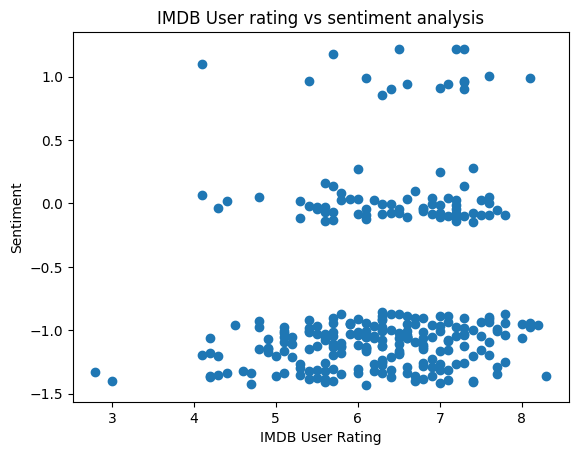

In [43]:
from matplotlib import pyplot

#Let's compare sentiment of movies agaisnt our rating
pyplot.scatter(unified_view["user_rating"], unified_view["sentiment"])
pyplot.title("IMDB User rating vs sentiment analysis")
pyplot.xlabel("IMDB User Rating")
pyplot.ylabel("Sentiment")

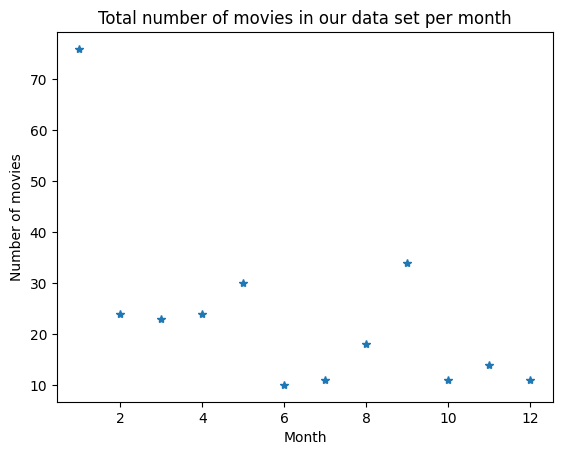

In [45]:
monthly_view = unified_view["release_month"].groupby(unified_view.release_month).agg('count')

#Let's compare number of movies to against month
pyplot.title("Total number of movies in our data set per month")
pyplot.xlabel("Month")
pyplot.ylabel("Number of movies")
pyplot.plot(monthly_view, "*")
pyplot.show()

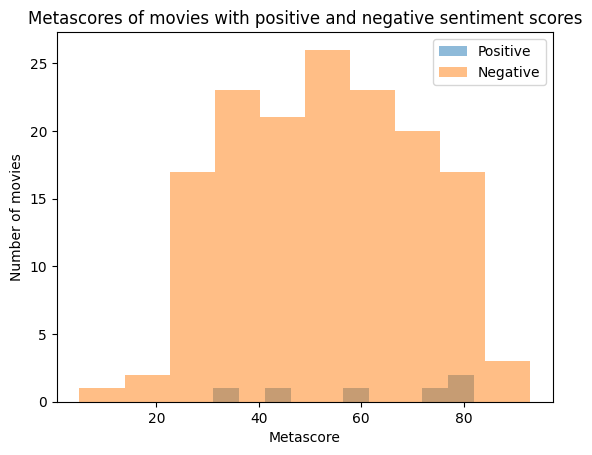

In [46]:
happy_movies = unified_view[unified_view["sentiment"] > 1].score
sad_movies = unified_view[unified_view["sentiment"] < -1].score

pyplot.title("Metascores of movies with positive and negative sentiment scores")
pyplot.xlabel("Metascore")
pyplot.ylabel("Number of movies")
pyplot.hist(happy_movies, alpha=0.5, label="Positive")
pyplot.hist(sad_movies, alpha=0.5, label="Negative")
pyplot.legend(loc="upper right")
pyplot.show()

Graph 1: Looking at the first graph one can see that there are a lot more movies that deemed to have a negative sentiment in 2015 comapre to the amount of movies that are deemed to be positve or even neutral. I began to think about what kind of events that could have been happened in the previous year that could have influenced the sentiment in 2015. I know of a couple events that happened such as the Malaysia Airlines Flight 370 diappeared, the ebola outbreak, and many east country war talks. These are some events in 2014 that could have had an effect on the movies in 2015. That is to say if these events were made into movies. That being said, the graph allowed me to see that there were far more negative movies in 2015 than positive or neutral movies. 

Graph 2: The second graph shows how many movies were dropped each month in 2015. This graph allowed me to see that there are over two times as many movies dropped in January compared to the next highest month (this being September). After learning that the January leds the months in total movies dropped by far, I began to wonder why this would be such a thing. Looking at the total number of movies per month, it reminded me of something the Professor Spence had discussed in his lecture. There is an abundance of movies that are dumped in the first month of the year. This is because producers will dump the movies that they know will not do well in January because this is the start of the next year that will be considered for awards. 

Graph 3: This graph essentially provides a way to see how many movies have the corresponding metascore as well as how many of those have a negative or positive sentiment. Looking at the graph one can see that there is an overwhelming amount of neagtive sentiment movies released in 2015. There are some positive movies areound 30, 40, 60, 70, and 80 metascore movies. I also found it interesting that the movies in 2015 have a higher chance at having a score of 50. This graph touches on what the first graph tought me. In 2015, there is a vast majority of negative movies comapred to positive movies. 

OLS Regression Results: The overall R-squared value for my regression is 0.946, this allows one to see that this regression equation is very accurate. The p>[t] value allows one to see which variables are successful and which aren't as successful. User rating is a .657, budget is a .014, opening weekend is a .000, votes is a .014, sentiment is a 0.143, runtime is a .146. One can see from these values that opening weekend, budget, and votes are the most successful variables determining gross sales in the regression model. On the other hand, user rating seems to be an unsuccessful variable in determining gross sales. 